In [ ]:
!pip install qiskit brian2 qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=2ee188b68f5ba679282455d1bfc130a00b423a0f8dedcd2e25fdae1f24ca06b6
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


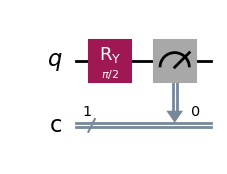

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_circuit_layout, circuit_drawer
import matplotlib.pyplot as plt
import numpy as np

# Variabel input (misalnya x = 0.5)
x = 0.5

# Membuat sirkuit kuantum 1 qubit dan 1 bit klasik
qc = QuantumCircuit(1, 1)
qc.ry(x * np.pi, 0)
qc.measure(0, 0)

# Tampilkan sirkuit dalam bentuk visual (gambar)
# This line requires a kernel restart after installing pylatexenc
qc.draw(output='mpl')

In [ ]:
from brian2 import *
import qiskit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# generate syntetic data
x = np.linspace(0, 10, 100)
y = 3 * x + 2 + np.random.normal(0, 1, size=x.shape)

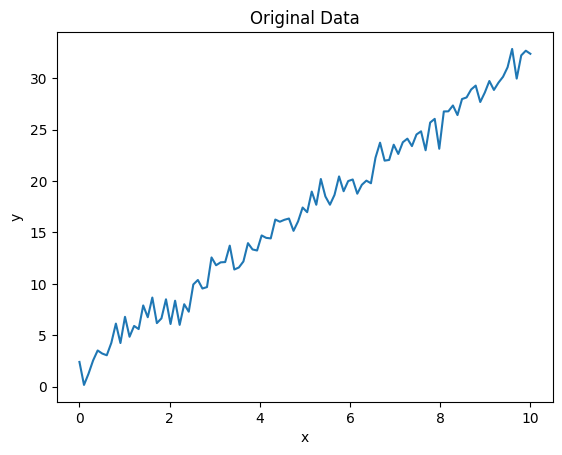

In [ ]:
import matplotlib.pyplot as plt

x_data = x
y_data = y
plt.plot(x_data, y_data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Data')
plt.show()

In [ ]:
"""
Simple Neuron Operator for Brain Organoids Intelligence implements
"""
def simple_neuron_operator(x):
    defaultclock.dt = 1*ms
    eqs = '''
    dv/dt = (-v + I) / (10*ms) : 1
    I : 1
    '''
    G = NeuronGroup(1, eqs, method='euler')

    G.I = x
    G.v = 0.0

    mon = StateMonitor(G, 'v', record=True)

    run(10*ms)

    return mon.v[0][-1]

In [ ]:
"""
Simple Quantum Computing
"""
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler as AerSampler
import numpy as np

def float_to_qubit_prob(x: float, shots: int = 1000) -> float:
	"""
	Encode a float value as a Y-rotation on a single qubit, simulate, and return the probability of measuring |1>.
	Args:
		x (float): Input value to encode (scaled by pi)
		shots (int): Number of shots for the simulation
	Returns:
		float: Probability of measuring qubit in state |1>
	"""
	sampler = AerSampler()
	qc = QuantumCircuit(1, 1)
	qc.ry(x * np.pi, 0)
	qc.measure(0, 0)
	job = sampler.run(qc, shots=shots)
	result = job.result()
	quasi_dist = result.quasi_dists[0]
	prob_1 = quasi_dist.get(1, 0.0)
	return prob_1

In [ ]:
wqc = np.random.normal()
wboi = np.random.normal()
b = 0
loss = 0.0

In [ ]:
best_loss = float('inf')
best_wqc = wqc
best_wboi = wboi
loss_history = []

for i, x_ in enumerate(x):
    boi_operation = simple_neuron_operator(x_)
    quantum_operation = float_to_qubit_prob(x_)
    y_ = (wqc*quantum_operation) + (wboi*boi_operation) + b
    loss_mse = (y_ - y[i]) ** 2
    loss_history.append(loss_mse)

    best_loss = loss_mse
    best_wqc = wqc
    best_wboi = wboi
    # if loss_mse < best_loss:
    #     best_loss = loss_mse
    #     best_wqc = wqc
    #     best_wboi = wboi
    #     print(f"Best loss updated: {best_loss:.4f} | wqc: {best_wqc:.4f} | wboi: {best_wboi:.4f}")

WARNING    /tmp/ipython-input-698057879.py:8: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  quantum_operation = float_to_qubit_prob(x_)
 [py.warnings]
  quantum_operation = float_to_qubit_prob(x_)



In [ ]:
loss_history

[np.float64(5.736670672397045),
 np.float64(0.06564137293619923),
 np.float64(2.386492130761377),
 np.float64(9.224420457654213),
 np.float64(18.801567698531063),
 np.float64(18.710974488058312),
 np.float64(19.610712000298836),
 np.float64(35.06993405662519),
 np.float64(64.40633327665186),
 np.float64(39.981827640151586),
 np.float64(80.36489176401265),
 np.float64(49.51871932409141),
 np.float64(64.52350539368909),
 np.float64(57.59015197264731),
 np.float64(94.96393116518455),
 np.float64(70.86918878947353),
 np.float64(103.0115794625728),
 np.float64(56.554764639779364),
 np.float64(61.99544847814037),
 np.float64(93.90685491353953),
 np.float64(53.59028411389931),
 np.float64(94.20652849021761),
 np.float64(56.90941294715354),
 np.float64(96.11924346284839),
 np.float64(87.03856982917462),
 np.float64(151.58806947895508),
 np.float64(171.5178768992056),
 np.float64(157.39025563114885),
 np.float64(165.3666538135685),
 np.float64(252.5302894128888),
 np.float64(231.6173084057811),

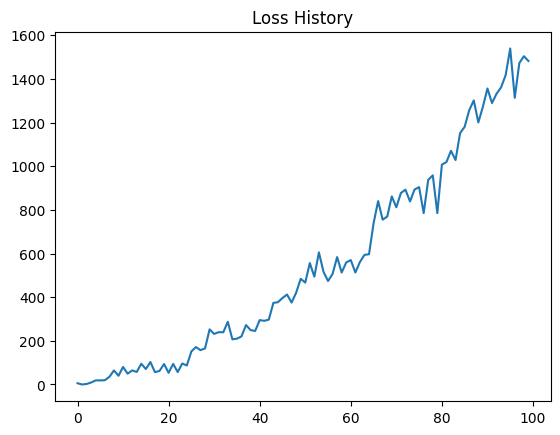

In [ ]:
plt.plot([i for i in range(0, len(loss_history))], loss_history)
plt.title("Loss History")
plt.show()

In [ ]:
# example of predict
x_test = 10
boi_operation = simple_neuron_operator(x_test)
quantum_operation = float_to_qubit_prob(x_test)
y_pred = (wqc*quantum_operation) + (wboi*boi_operation) + b
print(y_pred)

WARNING    /tmp/ipython-input-4098995175.py:4: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  quantum_operation = float_to_qubit_prob(x_test)
 [py.warnings]
  quantum_operation = float_to_qubit_prob(x_test)



-6.09680584761168


WARNING    /tmp/ipython-input-3403847411.py:4: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  quantum_op = float_to_qubit_prob(x_val)
 [py.warnings]
  quantum_op = float_to_qubit_prob(x_val)



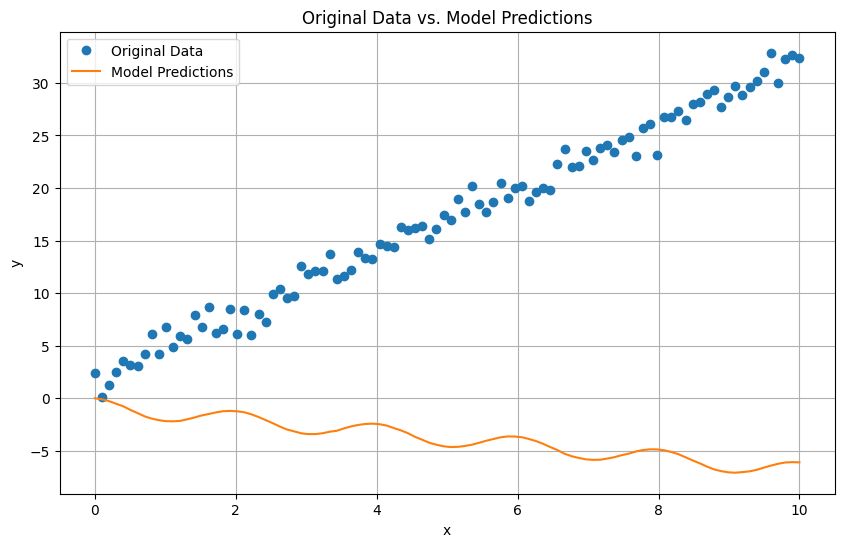

In [ ]:
predicted_y = []
for x_val in x_data:
    boi_op = simple_neuron_operator(x_val)
    quantum_op = float_to_qubit_prob(x_val)
    y_pred_val = (best_wqc * quantum_op) + (best_wboi * boi_op) + b
    predicted_y.append(y_pred_val)

plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'o', label='Original Data')
plt.plot(x_data, predicted_y, '-', label='Model Predictions')
plt.title('Original Data vs. Model Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()